<a href="https://colab.research.google.com/github/ZonaQuant/Notebooks/blob/main/HOMENAJE_A_LARRY_WILLIAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. PREÁMBULO

**Larry Williams** fue un pionero del **trading algorítmico** y generó indicadores como el **Williams %R**, que en mi modesta opinión es el mejor de todos.

Vamos a intentar demostrarlo montando una estrategia sólo a base del **Williams %R**... y un poquito de **machine learning**.



#1. LIBRERÍAS

##1.1 INSTALACIÓN DE LIBRERÍAS

In [ ]:
#INSTALAMOS YAHOO FINANCE PARA OBTENER HISTÓRICOS
!pip install yfinance 

#INSTALAMOS TA-LIB PARA CALCULAR EL INDICADOR WILLIAMS %R
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 719 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Selecting previously unselected package libta-lib0.
(Reading database ... 124013 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.6) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 271 kB 5.0 MB/s 
  

##1.2. IMPORTACIÓN DE LIBRERÍAS

In [ ]:
import yfinance as yf
import talib as tl
import numpy as np
import pandas as pd
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#2. VARIABLES

In [ ]:
#DEFINIMOS VARIABLES
ticker = "EURCHF=X"
periodo_total = 3650
periodo_oos = 365

#3. DATOS

In [ ]:
#OBTENEMOS Y DAMOS FORMATO A LAS FECHAS INICIAL Y FINAL
today = datetime.today() 
initial = today - dt.timedelta(days=periodo_total) 
today = today.strftime('%Y-%m-%d')
initial = initial.strftime('%Y-%m-%d')
#DESCARGAMOS DATOS HISTÓRICOS
data = yf.download(ticker, start=initial, end=today, progress=False)
#ELIMINAMOS COLUMNAS INÚTILES
data = data.drop(columns=["Adj Close","Volume"])
#CALCULAMOS RETORNO A UN DÍA VISTA EN PIPS
data["Return"] = (data["Close"].shift(-1) - data["Close"]) * 10000
#ELIMINAMOS NANS
data = data.dropna()
#MOSTRAMOS DATOS
data.head(5)

,Open,High,Low,Close,Return
Date,,,,,
2012-12-14,1.2079,1.20917,1.2074,1.20780,10.999441
2012-12-17,1.2090,1.20950,1.2072,1.20890,-7.599592
2012-12-18,1.2080,1.20880,1.2065,1.20814,-4.400015
2012-12-19,1.2079,1.21000,1.2073,1.20770,-5.099773
2012-12-20,1.2072,1.20835,1.2070,1.20719,0.100136


#4. WILLIAMS %R

In [ ]:
#PREPARAMOS DATOS PARA CALCULAR WILLIAMS %R CON LA LIBRERÍA TA-LIB
high = np.array(data["High"])
low = np.array(data["Low"])
close = np.array(data["Close"])

#CALCULAMOS WILLIAMS %R PARA UN RANGO DE PARÁMETROS Y GUARDAMOS EN LISTAS
wr = []
wr_columns = []  
periods = list(range(5,200))
for n in periods:
  name = "WR" + str(n)
  wr.append(pd.Series(tl.WILLR(high, low, close, timeperiod=n)))
  wr_columns.append(name)

#CREAMOS DATAFRAME 
df_wr = pd.concat(wr, axis=1)
df_wr.columns = wr_columns
df_wr.index = data.index
df_wr["Close"] = data["Close"]
df_wr["Return"] = data["Return"]

df_wr.tail(5)

,WR5,WR6,WR7,WR8,WR9,WR10,WR11,WR12,WR13,WR14,...,WR192,WR193,WR194,WR195,WR196,WR197,WR198,WR199,Close,Return
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-02,-30.395987,-30.395987,-30.395987,-24.365045,-24.365045,-24.365045,-24.365045,-24.365045,-24.365045,-19.935054,...,-60.464456,-60.464456,-60.464456,-60.464456,-60.464456,-60.464456,-60.464456,-60.464456,0.98583,14.799833
2022-12-05,-29.611461,-29.611461,-29.611461,-29.611461,-24.537544,-24.537544,-24.537544,-24.537544,-24.537544,-24.537544,...,-59.100542,-59.100542,-59.100542,-59.100542,-59.100542,-59.100542,-59.100542,-59.100542,0.98731,18.100142
2022-12-06,-14.640327,-14.640327,-14.640327,-14.640327,-14.640327,-12.131710,-12.131710,-12.131710,-12.131710,-12.131710,...,-57.432480,-57.432480,-57.432480,-57.432480,-57.432480,-57.432480,-57.432480,-57.432480,0.98912,-31.300187
2022-12-07,-56.516957,-40.529588,-40.529588,-40.529588,-40.529588,-40.529588,-33.584852,-33.584852,-33.584852,-33.584852,...,-60.317023,-60.317023,-60.317023,-60.317023,-60.317023,-60.317023,-60.317023,-60.317023,0.98599,24.899840
2022-12-08,-28.056371,-27.797524,-19.934233,-19.934233,-19.934233,-19.934233,-19.934233,-16.518506,-16.518506,-16.518506,...,-58.022319,-58.022319,-58.022319,-58.022319,-58.022319,-58.022319,-58.022319,-58.022319,0.98848,-5.499721


#5. PARTICIÓN

In [ ]:
#SEPARAMOS DATOS OUT OF SAMPLE DE LOS DATOS IN SAMPLE
df_wr_oos = df_wr.tail(periodo_oos)
df_wr_is = df_wr.drop(df_wr_oos.index)

#6. RANDOM FOREST

In [ ]:
#ELIMINAMOS NANS 
df_wr_is = df_wr_is.dropna()

#SEPARAMOS FEATURES DE LABEL
X = df_wr_is.iloc[:,:-2]
Y = df_wr_is["Return"]

#ENTRENAMOS RANDOM FOREST
regressor_wr = RandomForestRegressor()
regressor_wr.fit(X,Y)

#OBTENEMOS PREDICCIONES DEL MODELO
df_wr_is["Predict_RF"] = regressor_wr.predict(X)

#COMPROBAMOS LA CORRELACIÓN ENTRE LAS PREDICCIONES Y LOS RETORNOS CON DATOS IN SAMPLE
correlacion = df_wr_is["Predict_RF"].corr(df_wr_is["Return"])
print("Correlación con datos in sample entre el modelo y los retornos: ", correlacion)

Correlación con datos in sample entre el modelo y los retornos:  0.9294038671091888


#7. OOS

In [ ]:
#OBTENEMOS PREDICCIONES CON DATOS OUT OF SAMPLE
X_oos_wr = df_wr_oos.iloc[:,:-2]
predict_wr = regressor_wr.predict(X_oos_wr)

#GENERAMOS DATA FRAME CON LAS PREDICCIONES CON DATOS OUT OF SAMPLE
oos = pd.DataFrame({"meta_wr": predict_wr})
oos.index = df_wr_oos.index
oos["Return"] = df_wr_oos["Return"]

#COMPROBAMOS LA CORRELACIÓN ENTRE LAS PREDICCIONES Y LOS RETORNOS CON DATOS OUT OF SAMPLE
cor_oos = oos["meta_wr"].corr(oos["Return"])
print("Correlación con datos out of sample entre el modelo y los retornos: ", cor_oos)

Correlación con datos out of sample entre el modelo y los retornos:  0.30479032661176303


#8. BACKTEST

##8.1. SEÑALES 

In [ ]:
#GENERAMOS SEÑALES PARA OPERACIONES BAJISTAS
oos["Signal_short"] = np.where(oos["meta_wr"]<10,-1,0)
oos["Signal_short"] = oos["Signal_short"] * oos["Return"] 

#GENERAMOS SEÑALES PARA OPERACIONES ALCISTAS
oos["Signal_long"] = np.where(oos["meta_wr"]>10,1,0)
oos["Signal_long"] = oos["Signal_long"] * oos["Return"] 

##8.2. EQUITY

In [ ]:
#GENERAMOS EQUITY PARA OPERACIONES ALCISTAS
oos["Equity_long"] = oos["Signal_long"].cumsum()

#CALCULAMOS EQUITY PARA LAS OPERACIONES BAJISTAS
oos["Equity_short"] = oos["Signal_short"].cumsum()

#CALCULAMOS EQUITY PARA OPERACIONES ALCISTAS Y BAJISTAS EQUIPONDERADAS
oos["Equity"] = (oos["Equity_long"] + oos["Equity_short"]) / 2

##8.3. GRÁFICOS

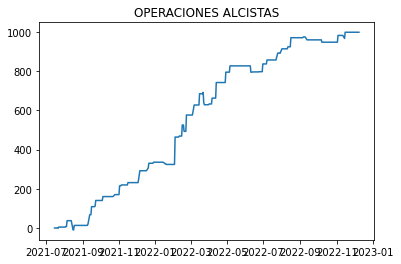

In [ ]:
plt.plot(oos["Equity_long"])
plt.title("OPERACIONES ALCISTAS")
plt.show()

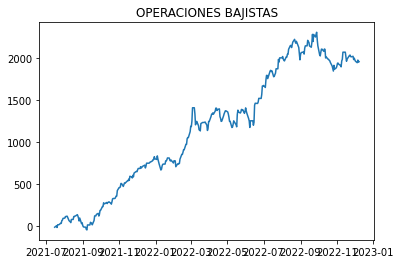

In [ ]:
plt.plot(oos["Equity_short"])
plt.title("OPERACIONES BAJISTAS")
plt.show()

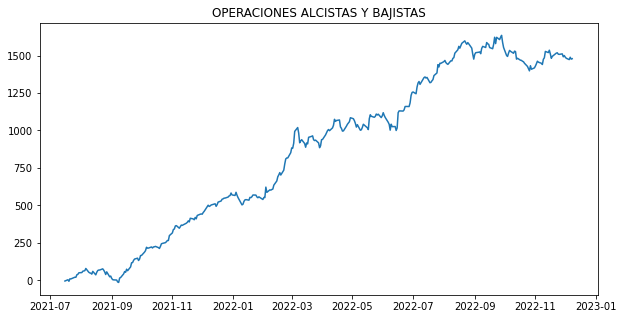

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(oos["Equity"])
plt.title("OPERACIONES ALCISTAS Y BAJISTAS")
plt.show()

In [ ]:
oos["Equity"][-1]

1479.1497588157654